In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
import json
import tweepy as tw
from timeit import default_timer as timer
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#reading the twitter-archive-enhanced.csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [3]:
#getting the image predictions data
image_predictions = rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

#writing it to a tsv file
with open('image_predictions.tsv', 'wb') as f:
    f.write(image_predictions)

#making a dataframe of the tsv file and displaying first 5 rows in it
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\\s')
image_predictions_df

C:\Users\deil click\AppData\Local\Temp\ipykernel_2432\3781429822.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\\s')


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#making a function to use the twitter api.
def get_tweet(consumer_key,consumer_secret,access_token,access_secret):
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tw.API(auth,  wait_on_rate_limit=True)

    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a tweet.json.txt file
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tw.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

#making a dictionary to store the data of each tweet coming from the tweet_json.txt file
tweet_json = []
#opening the tweet_josn.txt file and writing its data in the tweet_json dictionary
with open('tweet_json.txt', 'r') as file:
    for line in file:
        line = json.loads(line)
        tweet_json.append(line)

#making the json file data into a dataframe and displaying its first 5 rows
tweet_json_df = pd.DataFrame(tweet_json, columns=['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])
tweet_json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


4. Merging all dataframes

In [5]:
#changing name of id column in twitter_json_df to tweet_id
tweet_json_df.rename(columns={'id':'tweet_id'}, inplace=True)

#creating a master dataframe
master_df = pd.DataFrame(pd.merge(twitter_archive,image_predictions_df, on='tweet_id', how='outer'))
master_df = pd.DataFrame(pd.merge(master_df, tweet_json_df, on='tweet_id', how='outer'))

In [6]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2356 non-null   int64  
 1   in_reply_to_status_id_x        78 non-null     float64
 2   in_reply_to_user_id_x          78 non-null     float64
 3   timestamp                      2356 non-null   object 
 4   source_x                       2356 non-null   object 
 5   text                           2356 non-null   object 
 6   retweeted_status_id            181 non-null    float64
 7   retweeted_status_user_id       181 non-null    float64
 8   retweeted_status_timestamp     181 non-null    object 
 9   expanded_urls                  2297 non-null   object 
 10  rating_numerator               2356 non-null   int64  
 11  rating_denominator             2356 non-null   int64  
 12  name                           1611 non-null   o

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2356 non-null   int64  
 1   in_reply_to_status_id_x        78 non-null     float64
 2   in_reply_to_user_id_x          78 non-null     float64
 3   timestamp                      2356 non-null   object 
 4   source_x                       2356 non-null   object 
 5   text                           2356 non-null   object 
 6   retweeted_status_id            181 non-null    float64
 7   retweeted_status_user_id       181 non-null    float64
 8   retweeted_status_timestamp     181 non-null    object 
 9   expanded_urls                  2297 non-null   object 
 10  rating_numerator               2356 non-null   int64  
 11  rating_denominator             2356 non-null   int64  
 12  name                           1611 non-null   o

In [8]:
#displaying first 5 rows of master_df
master_df.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,False,8853.0,39467.0,False,False,False,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,False,6514.0,33819.0,False,False,False,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,False,4328.0,25461.0,False,False,False,False,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,False,8964.0,42908.0,False,False,False,False,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,False,9774.0,41048.0,False,False,False,False,en


In [9]:
#displaying last 5 rows of master_df
master_df.tail()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,None,None,False,41.0,111.0,False,False,False,False,en
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,None,None,False,147.0,311.0,False,False,False,False,en
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,None,None,False,47.0,128.0,False,False,False,False,en
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,None,None,False,48.0,132.0,False,False,False,False,en
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,None,None,False,532.0,2535.0,False,False,False,False,en


In [10]:
#getting a sample of the data
master_df.sample(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
1124,730211855403241472,NaN,NaN,2016-05-11 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,...,None,None,False,1182.0,4180.0,False,False,False,False,en
1032,745314880350101504,NaN,NaN,2016-06-21 17:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She excels underwater. 12/10 ph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745314880...,...,None,None,False,3131.0,7863.0,False,False,False,False,en
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,...,None,None,False,370.0,1824.0,False,False,NaN,NaN,und
1337,705102439679201280,NaN,NaN,2016-03-02 18:48:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terrenth. He just stubbed his toe. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705102439...,...,None,None,False,585.0,2342.0,False,False,False,False,en
2268,667517642048163840,NaN,NaN,2015-11-20 01:39:42 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667517642...,...,None,None,False,203.0,389.0,False,False,False,False,en


In [11]:
#displaying summary statisistics of all numerical columns
master_df.describe()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,favorite_count
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,7.455079e+17,2.014171e+16,3164.797366,8080.968564
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,7.582492e+16,1.252797e+17,5284.770364,11814.771334
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,6.658147e+17,1.185634e+07,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,6.757419e+17,3.086374e+08,624.500000,1415.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,7.038708e+17,4.196984e+09,1473.500000,3603.500000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,8.257804e+17,4.196984e+09,3652.000000,10122.250000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,8.862664e+17,8.405479e+17,79515.000000,132810.000000


In [12]:
#checking if the source_x and source_y columns are identical
master_df['source_x'].equals(master_df['source_y'])

False

In [13]:
#displaying problematic columns from master_df
master_df[['entities','extended_entities','user','display_text_range']]

,entities,extended_entities,user,display_text_range
0,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 85]"
1,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 138]"
2,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 121]"
3,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 79]"
4,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 138]"
...,...,...,...,...
2351,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 120]"
2352,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 137]"
2353,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 130]"
2354,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...","[0, 139]"


In [14]:
#separating entities column from master_df to have a clearer view of it
entities = pd.DataFrame(master_df['entities'].apply(pd.Series))
#separating all dictinary keys in the entities dataframe
entities = pd.concat([entities.drop('media',axis=1), entities['media'].apply(pd.Series)], axis=1)
entities

,hashtags,symbols,user_mentions,urls,0,0
0,[],[],[],[],NaN,"{'id': 892420639486877696, 'id_str': '89242063..."
1,[],[],[],[],NaN,"{'id': 892177413194625024, 'id_str': '89217741..."
2,[],[],[],[],NaN,"{'id': 891815175371796480, 'id_str': '89181517..."
3,[],[],[],[],NaN,"{'id': 891689552724799489, 'id_str': '89168955..."
4,"[{'text': 'BarkWeek', 'indices': [129, 138]}]",[],[],[],NaN,"{'id': 891327551943041024, 'id_str': '89132755..."
...,...,...,...,...,...,...
2351,[],[],[],[],NaN,"{'id': 666049244999131136, 'id_str': '66604924..."
2352,[],[],[],[],NaN,"{'id': 666044217047650304, 'id_str': '66604421..."
2353,[],[],[],[],NaN,"{'id': 666033409081393153, 'id_str': '66603340..."
2354,[],[],[],[],NaN,"{'id': 666029276303482880, 'id_str': '66602927..."


In [15]:
#check if there are duplicate tweets in master_df
master_df['tweet_id'].duplicated().sum()

0

In [16]:
#Seeing how many images aren't dogs in each prediction
print('p1', master_df['p1_dog'].value_counts())
print('p2', master_df['p2_dog'].value_counts())
print('p3', master_df['p3_dog'].value_counts())

p1 p1_dog
True     1532
False     543
Name: count, dtype: int64
p2 p2_dog
True     1553
False     522
Name: count, dtype: int64
p3 p3_dog
True     1499
False     576
Name: count, dtype: int64


In [17]:
#determining the most confident prediction
master_df[['p1_conf', 'p2_conf', 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


### Quality issues
1. values have a or none instad of NaN

2. there is alot of null values in a lot of columns

3. timestamp and created_at columns are object type

4. text and full_text columns are the same

5. source_x and source_y columns are identical

6. possibly_sensitive and possibly_sensitive_appealable are object type

7. display_text_range contains lists

8. created_at and timestamp are the same(nearly)

9. entities column has alot of empty lists

10. name column has a lot of empty values

11. Some image predictions are not dogs

12. There are retweets and replies

### Tidiness issues
1. created_at has more than one value

2. extended_entities and user have more than one variable

10. doggo,floofer,pupper,puppo columns should be merged


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
master_df_copy = master_df.copy()
master_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2356 non-null   int64  
 1   in_reply_to_status_id_x        78 non-null     float64
 2   in_reply_to_user_id_x          78 non-null     float64
 3   timestamp                      2356 non-null   object 
 4   source_x                       2356 non-null   object 
 5   text                           2356 non-null   object 
 6   retweeted_status_id            181 non-null    float64
 7   retweeted_status_user_id       181 non-null    float64
 8   retweeted_status_timestamp     181 non-null    object 
 9   expanded_urls                  2297 non-null   object 
 10  rating_numerator               2356 non-null   int64  
 11  rating_denominator             2356 non-null   int64  
 12  name                           1611 non-null   o

### Issue #1(quality):

#### Define: 

change values that are equal to a or none to NaN

#### Code

In [19]:
#a for loop that checks for 'a' and 'none' and change them to NaN
for column in master_df_copy.columns:
    master_df_copy[column].replace("a", np.nan, inplace=True)
    master_df_copy[column].replace("none", np.nan, inplace=True)

#### Test

In [20]:
#check if the issue is resolved by lookin at rows that previously had the problem
master_df_copy['name'].tail()

2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: name, dtype: object

In [21]:
#chceking the number of null values after resolving the issue usin .info()
master_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2356 non-null   int64  
 1   in_reply_to_status_id_x        78 non-null     float64
 2   in_reply_to_user_id_x          78 non-null     float64
 3   timestamp                      2356 non-null   object 
 4   source_x                       2356 non-null   object 
 5   text                           2356 non-null   object 
 6   retweeted_status_id            181 non-null    float64
 7   retweeted_status_user_id       181 non-null    float64
 8   retweeted_status_timestamp     181 non-null    object 
 9   expanded_urls                  2297 non-null   object 
 10  rating_numerator               2356 non-null   int64  
 11  rating_denominator             2356 non-null   int64  
 12  name                           1556 non-null   o

### Issue #2(quality) and issue #9(quality) and issue #12(quality):

#### Define: 

1. remove retweets and replies
2. Drop columns with too much NaN values and entities column

#### Code

In [22]:
#remove retweets
master_df_copy = master_df_copy[master_df_copy['retweeted_status_id'].isnull()]
master_df_copy = master_df_copy[master_df_copy['retweeted_status_user_id'].isnull()]
master_df_copy = master_df_copy[master_df_copy['retweeted_status_timestamp'].isnull()]
#remove replies
master_df_copy = master_df_copy[master_df_copy['in_reply_to_status_id_x'].isnull()]
master_df_copy = master_df_copy[master_df_copy['in_reply_to_user_id_x'].isnull()]

#drop the desired columns from master_df_copy
master_df_copy.drop(columns=['in_reply_to_status_id_x','in_reply_to_user_id_x','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','geo','coordinates','place','contributors','entities','in_reply_to_status_id_y', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name'],inplace=True)

#### Test

In [23]:
#checking if the columns are dropped using .info()
master_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2097 non-null   int64  
 1   timestamp                      2097 non-null   object 
 2   source_x                       2097 non-null   object 
 3   text                           2097 non-null   object 
 4   expanded_urls                  2094 non-null   object 
 5   rating_numerator               2097 non-null   int64  
 6   rating_denominator             2097 non-null   int64  
 7   name                           1439 non-null   object 
 8   doggo                          83 non-null     object 
 9   floofer                        10 non-null     object 
 10  pupper                         230 non-null    object 
 11  puppo                          24 non-null     object 
 12  jpg_url                        1971 non-null   object

### Issue #3(quality), Issue #8(quality) and issue #1(tidiness):

#### Define: 

1. make the created_at column only contain weekday and be categorical and rename it to weekday
2. chnage type of timestamp column to object

#### Code:

In [24]:
#1
#making created_at column contain the first 3 characters of each row(the weekday abbreviation) only
master_df_copy['created_at'] = master_df_copy['created_at'].apply(lambda x: x[0:3])
#changing the type of created_at column to category type
master_df_copy['created_at'] = master_df_copy['created_at'].astype('category')
#renaming created_at column to weekday
master_df_copy.rename(columns={'created_at': 'weekday'}, inplace=True)

In [25]:
#2
#changing the type of timestamp column to datetime type
master_df_copy['timestamp'] = pd.to_datetime(master_df_copy['timestamp'])

#### Test:

In [26]:
#dipalying created_at column after resolving the isues and renaming it
master_df_copy['weekday']

0       Tue
1       Tue
2       Mon
3       Sun
4       Sat
       ... 
2351    Mon
2352    Mon
2353    Sun
2354    Sun
2355    Sun
Name: weekday, Length: 2097, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [27]:
#checking the type of timestamp column
master_df_copy['timestamp'].dtype

datetime64[ns, UTC]

### Issue #4(quality) and issue #5(quality)

#### Define: 

1. drop text column and leave full_text
2. drop source_x and and leave source_y

#### Code:

In [28]:
#dropping full_text and source_x columns
master_df_copy.drop(columns=['text', 'source_x'],inplace=True)

#### Test:

In [29]:
#checking if the columns are dropped using .info()
master_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2097 non-null   int64              
 1   timestamp                      2097 non-null   datetime64[ns, UTC]
 2   expanded_urls                  2094 non-null   object             
 3   rating_numerator               2097 non-null   int64              
 4   rating_denominator             2097 non-null   int64              
 5   name                           1439 non-null   object             
 6   doggo                          83 non-null     object             
 7   floofer                        10 non-null     object             
 8   pupper                         230 non-null    object             
 9   puppo                          24 non-null     object             
 10  jpg_url                      

### Issue #6(quality):

#### Define:

change possibly_sensitive and possibly_sensitive_appealable type from object to bool

#### Code:

In [30]:
master_df_copy[['possibly_sensitive', 'possibly_sensitive_appealable']] = master_df_copy[['possibly_sensitive', 'possibly_sensitive_appealable']].astype(bool)

#### Test:

In [31]:
#cheking the type of modified columns
master_df_copy[['possibly_sensitive', 'possibly_sensitive_appealable']].dtypes

possibly_sensitive               bool
possibly_sensitive_appealable    bool
dtype: object

### Issue #7(quality):

#### Define:

change type of values in display_text_range column to tuple to change all lists in it to tuples

#### Code:

In [32]:
#changing the values of display_text_range column to themselves after applying the tuple funcyion on them
master_df_copy['display_text_range'] = master_df_copy['display_text_range'].apply(tuple)

#### Test:

In [33]:
#displaying modified column
master_df_copy['display_text_range']

0        (0, 85)
1       (0, 138)
2       (0, 121)
3        (0, 79)
4       (0, 138)
          ...   
2351    (0, 120)
2352    (0, 137)
2353    (0, 130)
2354    (0, 139)
2355    (0, 131)
Name: display_text_range, Length: 2097, dtype: object

### Issue #2(tidiness):

#### Define:

split extended_entities and user columns into different columns and delete any columns that can't be used

#### Code:

In [34]:
#making the extended_entities column a separated dataframe of lists containing dictionaries
extended_entities = master_df_copy['extended_entities'].apply(pd.Series)
#making a dataframe of columns each dictionary key
extended_entities = pd.DataFrame(extended_entities['media'].apply(lambda x: x[0] if isinstance(x, list) else {}))
extended_entities = pd.concat([extended_entities.drop('media', axis=1), extended_entities['media'].apply(pd.Series)], axis=1)
#dropping the video_info column from the extended_entities dataframe as it contains alot of null values
extended_entities.drop('video_info', axis=1, inplace=True)
#concatenating the extended_entities dataframe and the master_df_copy dataframe while droppin the original extended entities dataframe
master_df_copy = pd.concat([master_df_copy.drop('extended_entities', axis=1),extended_entities], axis=1)


#makint the user column a separated dataframe
user = master_df_copy['user'].apply(pd.Series)
#renaming some columns in the user dataframe to not hav duplicated column names after concatenating it and the master_df_copy dataframe
user.rename(columns={'name':'user_name','favourites_count': 'user_favourites_count', 'id':'user_id', 'id_str':'user_id_str'},inplace=True)
#drppig some useless columns from the user dataframe
user.drop(['profile_sidebar_fill_color','profile_text_color','translator_type','profile_sidebar_border_color'], axis=1, inplace=True)
master_df_copy = pd.concat([master_df_copy.drop('user', axis=1),user], axis=1)



In [35]:
#dropping more columns after concatenating all dataframes
columns = ['utc_offset','time_zone','additional_media_info','user_id','user_id_str']
master_df_copy.drop(columns,axis=1, inplace=True)

#### Test:

In [36]:
#checking if the added columns are added and the dropped columns are dropped
master_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 79 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   tweet_id                            2097 non-null   int64              
 1   timestamp                           2097 non-null   datetime64[ns, UTC]
 2   expanded_urls                       2094 non-null   object             
 3   rating_numerator                    2097 non-null   int64              
 4   rating_denominator                  2097 non-null   int64              
 5   name                                1439 non-null   object             
 6   doggo                               83 non-null     object             
 7   floofer                             10 non-null     object             
 8   pupper                              230 non-null    object             
 9   puppo                               24 non-nul

### Issue #11(quality):

### Define:

impute the name column

### Code:

In [37]:
#making a series of lists where each row contains the splitted form of the corresponding row from the name column of the master_df_copy dataframe
names = master_df_copy['full_text'].str.split('.')
#making a for loop that changes each row in the names series to contain only the name of the dog
master_df_copy['name'] = names.apply(lambda x: x[0][7:] if x[0][0] == 'T' else x[0][14:])

### Test:

In [38]:
#cheking if the null values are replaced
master_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 79 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   tweet_id                            2097 non-null   int64              
 1   timestamp                           2097 non-null   datetime64[ns, UTC]
 2   expanded_urls                       2094 non-null   object             
 3   rating_numerator                    2097 non-null   int64              
 4   rating_denominator                  2097 non-null   int64              
 5   name                                2097 non-null   object             
 6   doggo                               83 non-null     object             
 7   floofer                             10 non-null     object             
 8   pupper                              230 non-null    object             
 9   puppo                               24 non-nul

In [39]:
print(master_df_copy['name'])

0                                   Phineas
1                                     Tilly
2                                    Archie
3                                     Darla
4                                  Franklin
                       ...                 
2351             1949 1st generation vulpix
2352                a purebred Piers Morgan
2353                              happy pup
2354     a western brown Mitsubishi terrier
2355                  Japanese Irish Setter
Name: name, Length: 2097, dtype: object


In [40]:
master_df_copy

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,profile_image_url_https,profile_banner_url,profile_link_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications
0,892420643555336193,2017-08-01 16:23:56+00:00,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
1,892177421306343426,2017-08-01 00:17:27+00:00,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
2,891815181378084864,2017-07-31 00:18:03+00:00,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
3,891689557279858688,2017-07-30 15:58:51+00:00,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
4,891327558926688256,2017-07-29 16:00:24+00:00,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,https://twitter.com/dog_rates/status/666049248...,5,10,1949 1st generation vulpix,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
2352,666044226329800704,2015-11-16 00:04:52+00:00,https://twitter.com/dog_rates/status/666044226...,6,10,a purebred Piers Morgan,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
2353,666033412701032449,2015-11-15 23:21:54+00:00,https://twitter.com/dog_rates/status/666033412...,9,10,happy pup,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False
2354,666029285002620928,2015-11-15 23:05:30+00:00,https://twitter.com/dog_rates/status/666029285...,7,10,a western brown Mitsubishi terrier,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/profile_images/861415328...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,False,True,False,False,True,False,False


### Issue #12(quality):

#### Define:

drop the rows where p1_dog column is false

#### Code:

In [41]:
master_df_copy = master_df_copy[master_df_copy['p1_dog'] == True]

#### Test:

In [42]:
master_df_copy['p1_dog'].value_counts()

p1_dog
True    1463
Name: count, dtype: int64

### Issue #3(tidiness):

#### Define:

merge the doggo,fluffer,pupper and puppo column

In [43]:
df = pd.DataFrame()
df[['doggo','floofer','pupper','puppo']] = master_df_copy[['doggo','floofer','pupper','puppo']].copy()

# handle none
df['doggo'].replace('None', '', inplace=True)
df['floofer'].replace('None', '', inplace=True)
df['pupper'].replace('None', '', inplace=True)
df['puppo'].replace('None', '', inplace=True)

# merge into column
df['stage'] = df['doggo'] + df['floofer'] + df['pupper'] + df['puppo']

# handle multiple stages
df.loc[df['stage'] == 'doggopupper', 'stage'] = 'doggo, pupper'
df.loc[df['stage'] == 'doggopuppo', 'stage'] = 'doggo, puppo'
df.loc[df['stage'] == 'doggofloofer', 'stage'] = 'doggo, floofer'

# handle missing values
df.loc[df['stage'] == '', 'stage'] = np.nan

#add new column to master_df_copy
master_df_copy['stage'] = df['stage']

#drop the stage column since it has so much NaN value
master_df_copy.drop(['stage','doggo','floofer','pupper','puppo'], axis=1, inplace=True)

C:\Users\deil click\AppData\Local\Temp\ipykernel_2432\2466549877.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_copy['stage'] = df['stage']
C:\Users\deil click\AppData\Local\Temp\ipykernel_2432\2466549877.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_copy.drop(['stage','doggo','floofer','pupper','puppo'], axis=1, inplace=True)


In [44]:
master_df_copy[['stage','doggo','floofer','pupper','puppo']]

KeyError: "None of [Index(['stage', 'doggo', 'floofer', 'pupper', 'puppo'], dtype='object')] are in the [columns]"

In [ ]:
master_df[['doggo','floofer','pupper','puppo']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    97 non-null     object
 1   floofer  10 non-null     object
 2   pupper   257 non-null    object
 3   puppo    30 non-null     object
dtypes: object(4)
memory usage: 73.8+ KB


#### Test

In [ ]:
master_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 1 to 2355
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   tweet_id                            1463 non-null   int64              
 1   timestamp                           1463 non-null   datetime64[ns, UTC]
 2   expanded_urls                       1463 non-null   object             
 3   rating_numerator                    1463 non-null   int64              
 4   rating_denominator                  1463 non-null   int64              
 5   name                                1463 non-null   object             
 6   doggo                               57 non-null     object             
 7   floofer                             8 non-null      object             
 8   pupper                              151 non-null    object             
 9   puppo                               20 non-nul

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
master_df_copy.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [48]:
#making a dataframe of the number of dogs of each type
number_dog = pd.DataFrame(master_df_copy['p1'].value_counts())
#resetting index
number_dog.reset_index(inplace=True)
#renaming the column after resetting index
number_dog.rename({'p1': 'type'}, axis=1, inplace=True)
#displaying the dataframe
number_dog


,type,count
0,golden_retriever,137
1,Labrador_retriever,94
2,Pembroke,88
3,Chihuahua,78
4,pug,54
...,...,...
106,Scotch_terrier,1
107,EntleBucher,1
108,Japanese_spaniel,1
109,standard_schnauzer,1


In [46]:
#making a dataframe of the sum of the favorite_count column of the group of the p1 column of the master_df_copy dataframe
favourite_count_grp = pd.DataFrame(master_df_copy[master_df_copy['p1_dog'] == True].groupby('p1')['favorite_count'].sum())
#sorting the values descendingly by the favorite_count column
favourite_count_grp.sort_values(by='favorite_count', ascending=False, inplace=True)
#resetting the index so that p1 is treated as a column
favourite_count_grp.reset_index(inplace=True)
#displaying the favourite_count_grp dataframe
favourite_count_grp

favourite_count_grp.to_csv('fav_count.csv')

In [ ]:
#making a list of average favourite count of each dog types
avg_favorite = favourite_count_grp.sort_values('p1', ascending=False)['favorite_count'] / number_dog.sort_values('type', ascending=False)['count']
#making a dataframe
avg_favorite_df = pd.DataFrame(number_dog.sort_values('type', ascending=False)['type'], columns=['type'])
avg_favorite_df['avg_favorite_count'] = avg_favorite
#sorting values
avg_favorite_df.sort_values('avg_favorite_count', ascending=False, inplace=True)
avg_favorite_df

,type,avg_favorite_count
0,golden_retriever,12361.131387
1,Labrador_retriever,11880.968085
5,chow,11359.463415
2,Pembroke,11304.034091
13,miniature_pinscher,11095.095238
...,...,...
106,Scotch_terrier,2678.000000
107,EntleBucher,2655.000000
108,Japanese_spaniel,2046.000000
109,standard_schnauzer,1896.000000


In [ ]:
avg_favorite_df['type']

0        golden_retriever
1      Labrador_retriever
5                    chow
2                Pembroke
13     miniature_pinscher
              ...        
106        Scotch_terrier
107           EntleBucher
108      Japanese_spaniel
109    standard_schnauzer
110               clumber
Name: type, Length: 111, dtype: object

In [ ]:
#making a dataframe of the sum of the retweet_count column of the group of the rating_numerator and rating_denominator columns of the master_df_copy dataframe
rating_grp = pd.DataFrame(master_df_copy[master_df_copy['p1_dog'] == True].groupby(['rating_numerator','rating_denominator'])['retweet_count'].sum(), index=None)
#sorting the values descendingly by the retweet_count column
rating_grp.sort_values(by='retweet_count', ascending=False, inplace=True)
#resetting the index so that rating_numerator and rating_denominator are treated as a column
rating_grp.reset_index(inplace=True)
#displaying the rating_grp dataframe
rating_grp

,rating_numerator,rating_denominator,retweet_count
0,13,10,1475443.0
1,12,10,1137959.0
2,11,10,644467.0
3,10,10,434610.0
4,14,10,183536.0
5,9,10,85584.0
6,8,10,43658.0
7,5,10,18634.0
8,7,10,18610.0
9,6,10,12423.0


### Insights:
1. Golden retrievers have the most tweets.

2. Golden retrievers tweets have the highest total favorite count.

3. Japanese spaniels tweets have the lowest total favorite count.

4. Golden retrievers have the highest average favorite count.

5. Clumbers have the lowest average favorite count.

6. Posts with a rating denominator of 10 receive more retweets.

7. Extremely high or low rating numerators and denominators lead to fewer retweets.

### Visualization

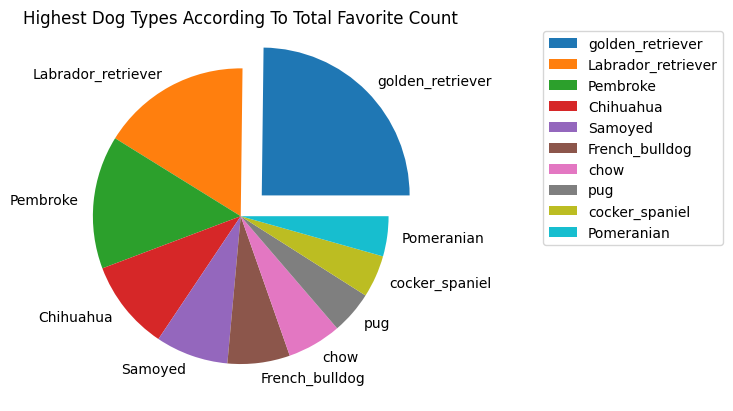

In [ ]:
#making a pie chart revealing the type of dog with the highest favorite_count
plt.pie(favourite_count_grp['favorite_count'][:10], labels=favourite_count_grp['p1'][:10], explode=[0.2,0,0,0,0,0,0,0,0,0])

#setting a title for the plot
plt.title('Highest Dog Types According To Total Favorite Count')

#setting a legend for the plot
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.02), loc='upper left')

#showing the pie chart
plt.show()

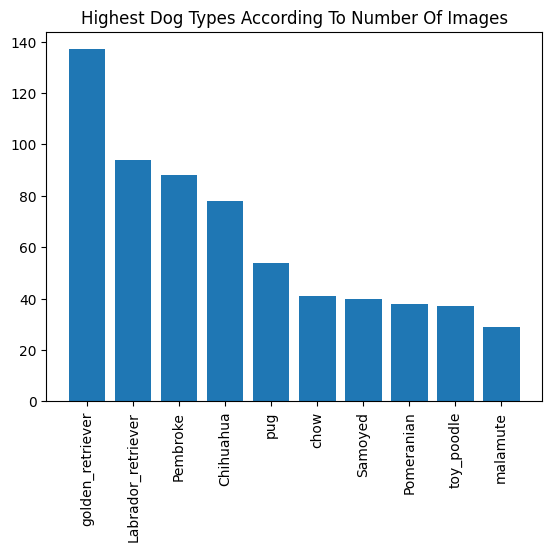

In [ ]:
#making a bar chart revealing the type of dog with the highest number of images
plt.bar(number_dog['type'][:10],number_dog['count'][:10])

#setting a title for the plot
plt.title('Highest Dog Types According To Number Of Images')



#rotating lables
plt.xticks(rotation=90)

#showing the pie chart
plt.show()

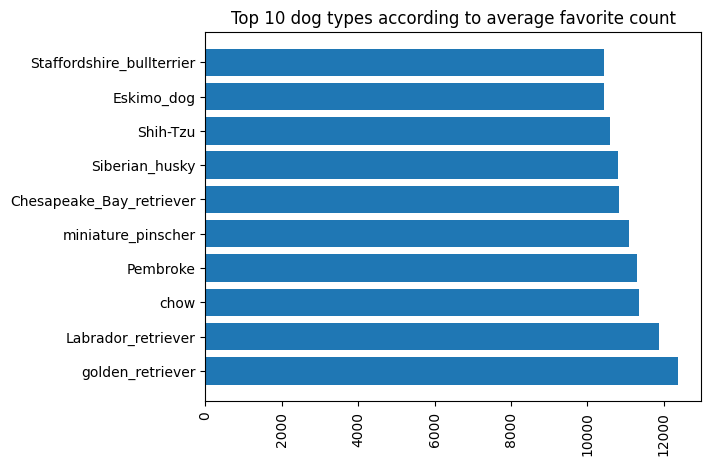

In [ ]:
#making a bar plot of the average favorite count
plt.barh(avg_favorite_df['type'][:10],avg_favorite_df['avg_favorite_count'][:10])

#setting a title for the plot
plt.title('Top 10 dog types according to average favorite count')

#rotating lables
plt.xticks(rotation=90)

#showing the pie chart
plt.show()